In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd 
import os 
import sys
import time 
import tensorflow as tf 
from tensorflow import keras 

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
# 导入数据
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# 归一化 x = (x-u)/std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784] -> [None, 28, 28]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

print(x_train_scaled.shape)
print(x_valid_scaled.shape)
print(x_test_scaled.shape)
print(np.max(x_train), np.min(x_train), np.max(x_train_scaled), np.min(x_train_scaled))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)
255 0 2.0231433 -0.8105136


In [8]:
# tf.keras.models.Sequential()

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

for _ in range(30):
    model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='sgd',
             metrics = ['accuracy'])

In [9]:
# Tensorboard, EarlyStopping, ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, 
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, 
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3),
]

history=model.fit(x_train_scaled, y_train, epochs=10, 
                 validation_data=(x_valid_scaled, y_valid),
                 callbacks = callbacks)



Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2859 - accuracy: 0.1454 - val_loss: 2.1871 - val_accuracy: 0.2040
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6930 - accuracy: 0.2965 - val_loss: 1.3139 - val_accuracy: 0.4648
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1082 - accuracy: 0.5760 - val_loss: 0.8631 - val_accuracy: 0.7174
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9189 - accuracy: 0.6648 - val_loss: 1.0288 - val_accuracy: 0.6258
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8396 - accuracy: 0.6799 - val_loss: 0.7384 - val_accuracy: 0.7374
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7951 - accuracy: 0.6973 - val_loss: 0.7128 - val_accuracy: 0.7328
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6635 - accuracy: 0.7400 - val_loss: 0.5893 - val_accuracy:

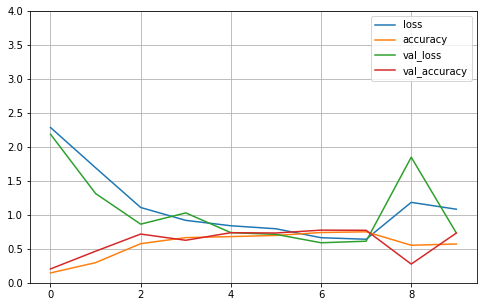

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 4)
    plt.show()
plot_learning_curves(history)

# 1. 参数众多，训练不充分
# 2. 梯度（导数）消失 --> 链式法则 --> 复合函数求导 f(g(x)) 

In [11]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7674 - accuracy: 0.7237


[0.7673986554145813, 0.7236999869346619]